In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib
import statsmodels.stats.outliers_influence as sso

import self_defined_functions as ft
import seaborn as sns

from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )

# TRA

In [3]:
df_5 = df_all['trans_cnt']

In [4]:
df_5 = pd.concat( [df_5, df_all['date']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['year']], axis = 1 )

In [5]:
dummy = pd.get_dummies( df_all['weekday'], prefix = 'weekday' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["weekday_6"]

In [6]:
dummy = pd.get_dummies( df_all['belong'], prefix = 'belong' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["belong_weekend"]

In [7]:
dummy = pd.get_dummies( df_all['phase'], prefix = 'phase' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["phase_mid"]
del df_5['phase_None']

In [8]:
dummy = pd.get_dummies( df_all['is_typhoon'], prefix = 'is_typhoon' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["is_typhoon_False"]

In [9]:
df_5_to_pre = df_5[df_5['year'] >= 2020]


In [10]:
df_5 = df_5[df_5['year'] < 2020]

In [11]:
y_data = df_5.iloc[:,:1] # If yvalue is in the fisrt column
x_data = sm.add_constant( df_5.iloc[:,2:] ) # If yvalue is in the fisrt column
olsmod = sm.OLS( y_data, x_data )
result_reg = olsmod.fit()
print( result_reg.summary() )

                            OLS Regression Results                            
Dep. Variable:              trans_cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1301.
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        02:32:15   Log-Likelihood:                -67910.
No. Observations:                5478   AIC:                         1.358e+05
Df Residuals:                    5464   BIC:                         1.359e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.611e+07    3.7

In [12]:
pre = result_reg.predict( sm.add_constant( df_5_to_pre.iloc[:,2:] ))
df_5_to_pre = pd.concat( [df_5_to_pre, pre], axis = 1, names = ['Predict'] )

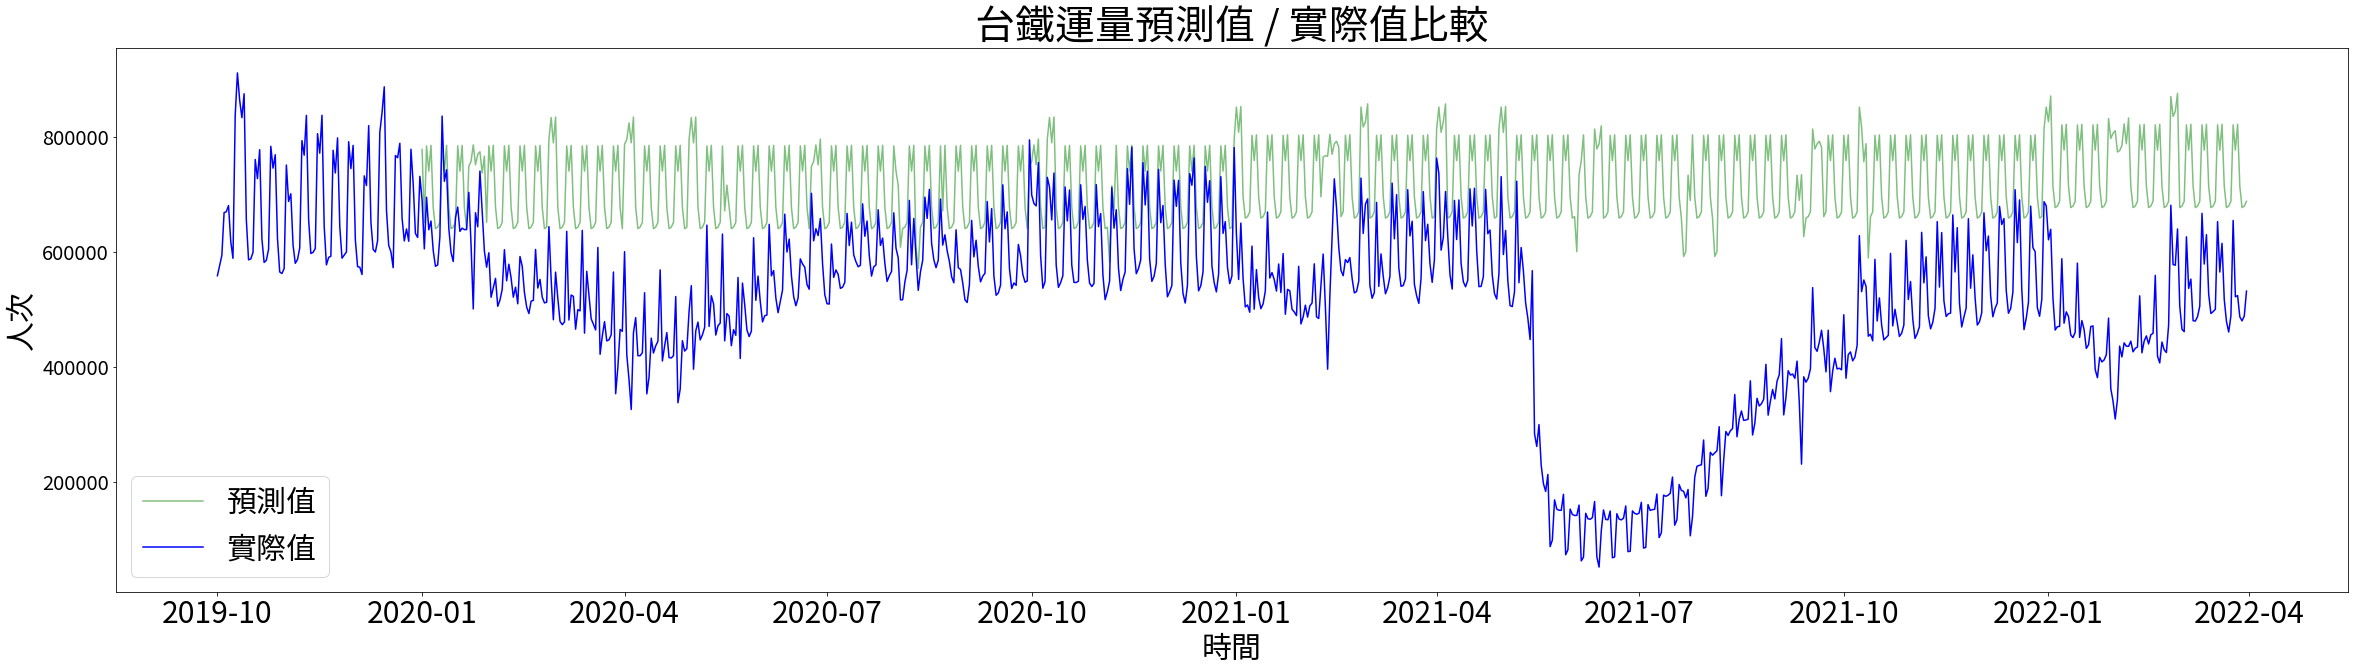

In [13]:
df_display = df_all[np.array( df_all['date'] >= dt.datetime( 2019, 10, 1 )) & np.array( df_all['date'] <= dt.datetime( 2022, 3, 31 ))]
df_5_to_pre = df_5_to_pre[np.array( df_5_to_pre['date'] <= dt.datetime( 2022,3,31 ))]
fig, ax = plt.subplots( figsize = ( 40, 10 ) )
plt.plot( df_5_to_pre['date'], df_5_to_pre.iloc[:,-1],  label = '預測值', c = 'g', alpha = 0.5)
plt.plot( df_display['date'], df_display['trans_cnt'], label = '實際值', c = 'b' )
plt.title( '台鐵運量預測值 / 實際值比較', fontsize = 40 )
plt.xlabel( '時間', fontsize = 30 )
plt.ylabel( '人次', fontsize = 30 )
plt.xticks( fontsize = 30 )
plt.yticks( fontsize = 20 )
plt.legend( prop = {'size':30}, loc = 'lower left' )
ax.ticklabel_format(style='sci', scilimits=(-1,100), axis='y')
plt.savefig( 'images/TRA_Regression.jpg' )

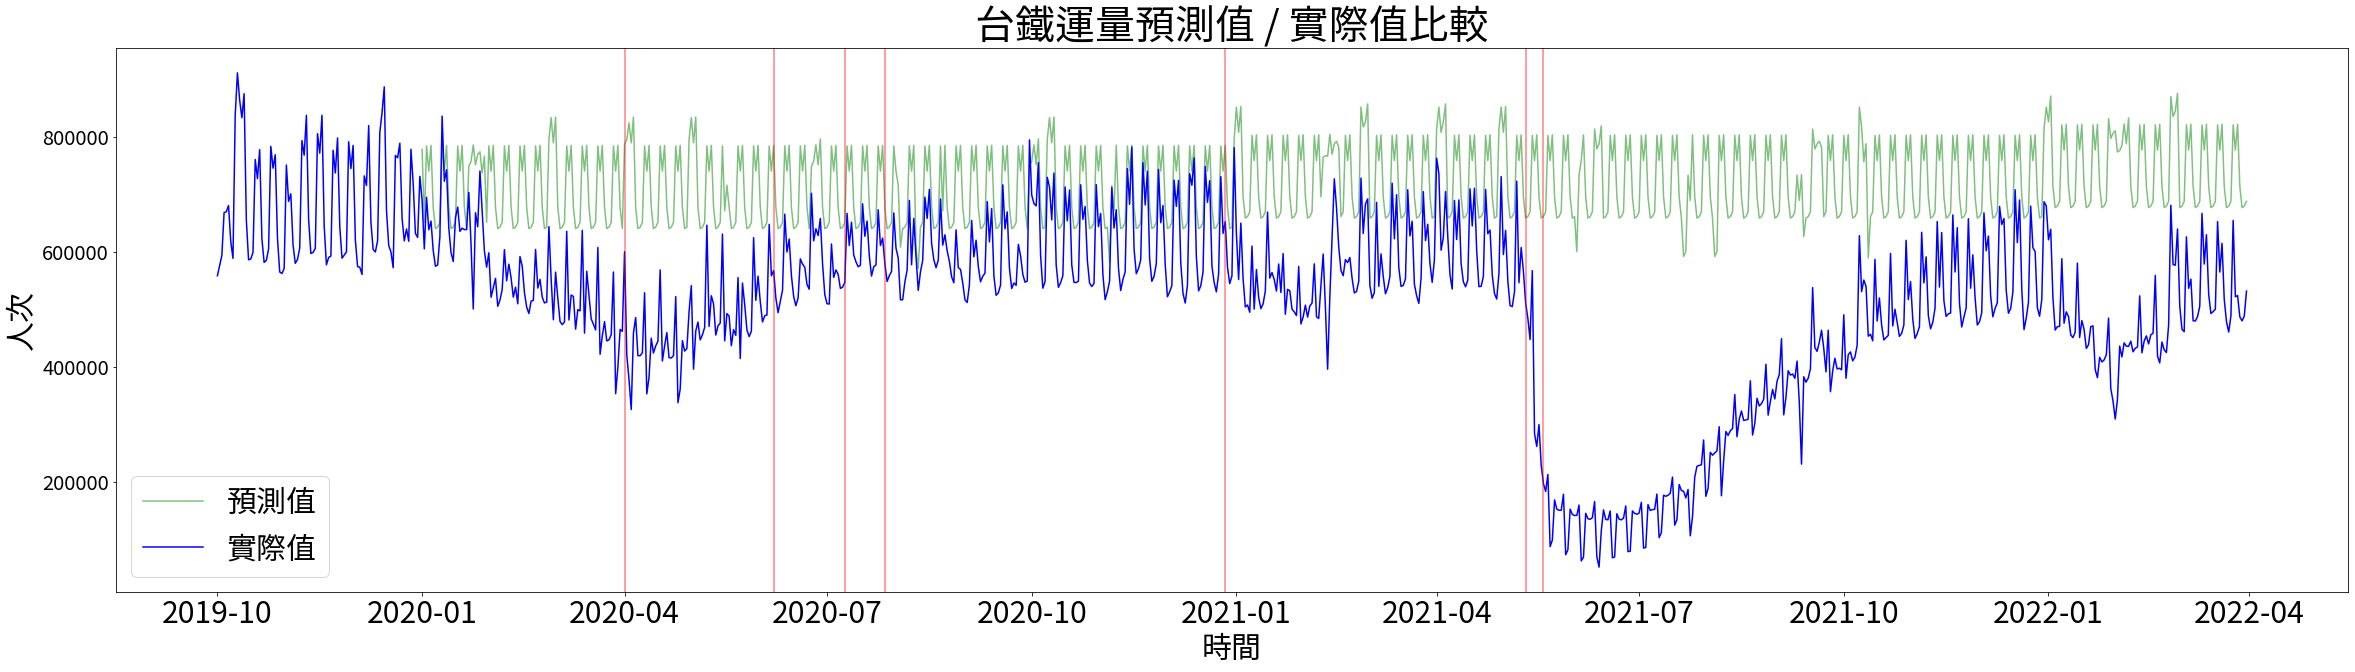

In [14]:
df_display = df_all[np.array( df_all['date'] >= dt.datetime( 2019, 10, 1 )) & np.array( df_all['date'] <= dt.datetime( 2022, 3, 31 ))]
fig, ax = plt.subplots( figsize = ( 40, 10 ) )
plt.plot( df_5_to_pre['date'], df_5_to_pre.iloc[:,-1],  label = '預測值', c = 'g', alpha = 0.5 )
plt.plot( df_display['date'], df_display['trans_cnt'], label = '實際值', c = 'b')
plt.title( '台鐵運量預測值 / 實際值比較', fontsize = 40 )
plt.axvline( x = dt.datetime( 2020, 4, 1 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2020, 6, 7 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2020, 7, 9 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2020, 7, 27 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2020, 12, 27 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2021, 5, 11 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2021, 5, 19 ), c = 'r', alpha = 0.5 )
plt.xlabel( '時間', fontsize = 30 )
plt.ylabel( '人次', fontsize = 30 )
plt.xticks( fontsize = 30 )
plt.yticks( fontsize = 20 )
plt.legend( prop = {'size':30}, loc = 'lower left' )
plt.savefig( 'images/TRA_Regression_time.jpg' )

## Regression Diagnostics 

### Multicollinearity

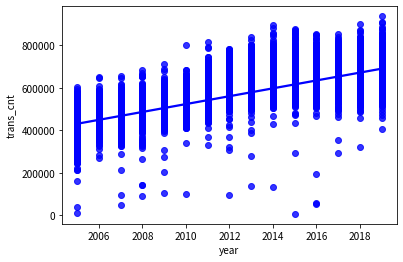

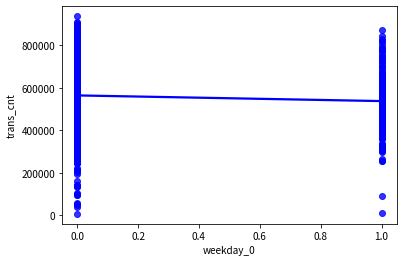

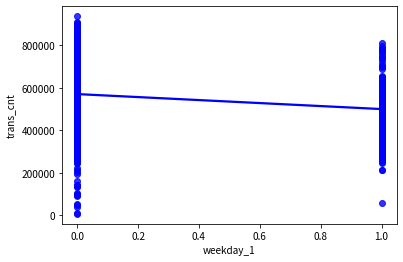

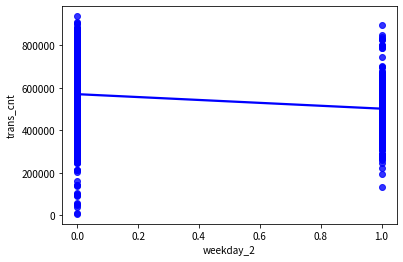

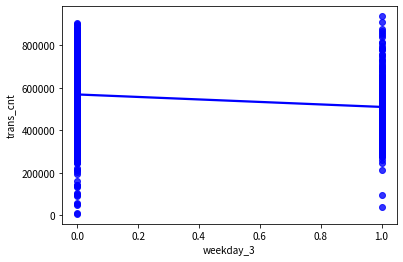

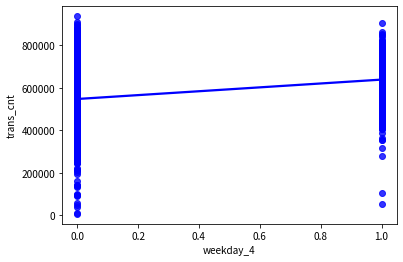

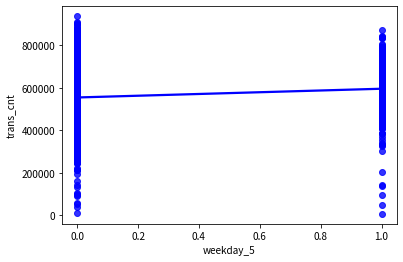

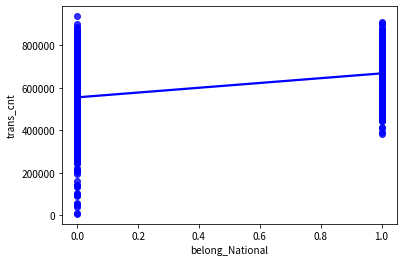

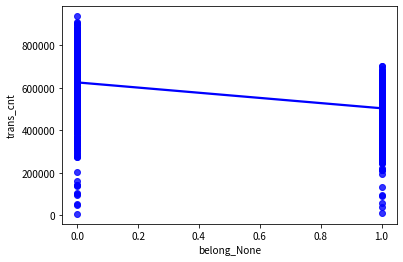

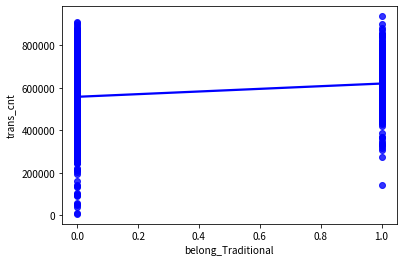

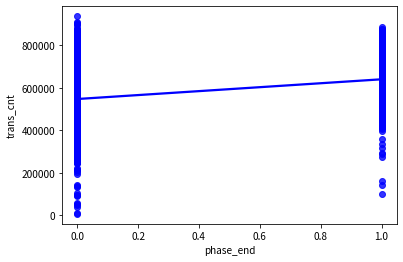

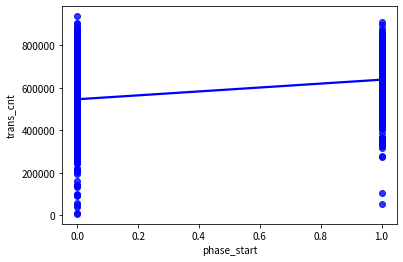

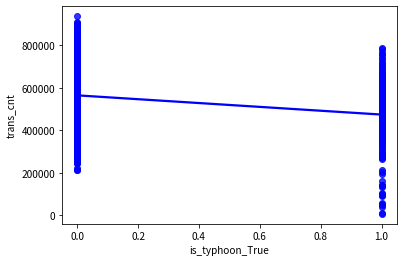

In [15]:
y_var = df_5['trans_cnt'].values
xnames = list( df_5.keys() )[2:]
for aname in xnames:
    x_var = df_5[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df_5, color = 'b', ci = None)
    plt.xlabel( aname )
    plt.ylabel( 'trans_cnt' )
    plt.show()

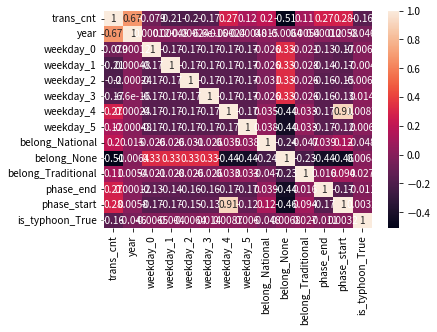

In [16]:
corr_1_3 = df_5.corr()
_ = sns.heatmap(corr_1_3, annot=True)

year 跟 trans_cnt 的相關性比較高；另外 weekday_4（是不是週五） 跟 phase_start 相關性也很高，因為幾乎每個假期周五都會被歸類在 start 裡。除此之外多元共線性的問題並沒有很明顯。

### Autocorrelation

In [17]:
st, data, ss2 = sso.summary_table( result_reg, alpha=0.05 )
print( "Columns in data are: %s" % ss2 )
# Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


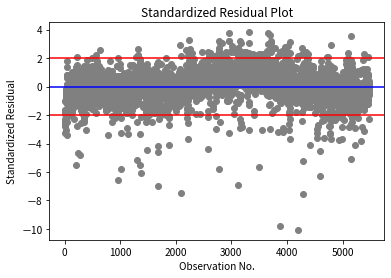

In [18]:
ID = df_5.index
plt.plot( ID, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

In [19]:
d_w = ft.Durbin_Watson_test( SD )
print(d_w)

x_square_sum =  5488.6148311928155
size =  5478
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.         -0.25250785  0.72334227 ... -2.23998513  1.72037203
  0.13911973]
d =  0.8899518112304061
0.8899518112304061


因為樣本數（5748）跟自變數（15）都很多，所以可以預期 $d_l$ 應該很接近 $2$，但算出來的 dvalue 只有 0.89 左右，因此可以知道具有 Positive autocorrelation。但是目前的 index 已經是照時間排了，所以目前暫時無法解決這個問題。

## Residual Analysis

### Normality

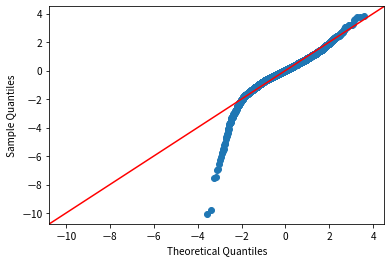

In [20]:
fig = sm.qqplot( SD, stats.norm, fit=True, line = '45' ) 

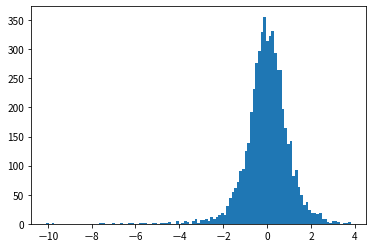

In [21]:
_ = plt.hist( SD, bins='auto' )

$$
H_0 : \text{The distribution is normal.} \\
H_1 : \text{The distribution is not normal.}
$$

In [22]:
stats.shapiro( SD )

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9295998215675354, pvalue=5.605193857299268e-45)

拒絕虛無假設，標準化殘差並非常態分布

### Heteroscedasticity and homoscedasticity

$$
H_0 : \text{Homoscedasticity}\\
H_1 : \text{Heteroscdasticity}
$$

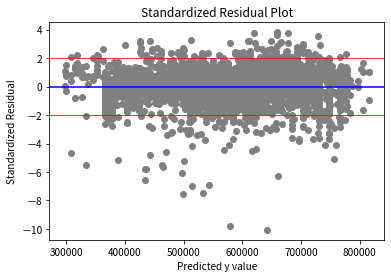

In [23]:
y_pre = data[:, 2]
plt.plot( y_pre, SD, 'o', color='gray' )
plt.axhline( y=2, color='red', lw=0.8 )
plt.axhline( y=0, color='blue' )
plt.axhline( y=-2, color='red', lw=0.8 )
plt.title( 'Standardized Residual Plot' )
plt.xlabel( 'Predicted y value' )
plt.ylabel( 'Standardized Residual' )
plt.show()

看起來變異差異並不大，因此不拒絕虛無假設

### Non-independent of the Error Variable

$$
H_0 : \text{Randomness exists}\\
H_1 : \text{Randomness does not exist}
$$

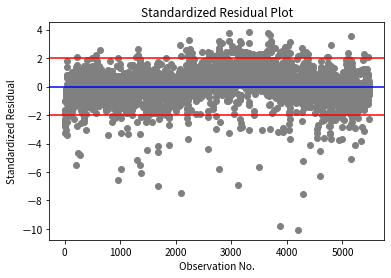

runs =  1235
n1 =  2739
n2 =  2739
runs_exp =  2740.0
stan_dev =  37.003377607383
z =  -40.671962866971334
pval_z =  0.0
p_value for Z-statistic=  0.0


In [24]:
Id1 = data[ :, 0 ]
plt.plot( Id1, SD, 'o', color='gray' )
plt.axhline( y=0, color='blue' )
plt.axhline( y=2, color='red' )
plt.axhline( y=-2, color='red' )
plt.title( 'Standardized Residual Plot' )
plt.xlabel( 'Observation No.' )
plt.ylabel( 'Standardized Residual' )
plt.show()

SD_median = np.median( SD )
Z_pval = ft.runsTest( SD, SD_median )
print( 'p_value for Z-statistic= ', Z_pval )

拒絕虛無假設，因此誤差項並非隨機分布

# Metro

In [25]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )
df_5_metro = df_all['metro_cnt']

In [26]:
df_5_metro = pd.concat( [df_5_metro, df_all['date']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['year']], axis = 1 )
# df_5_metro = pd.concat( [df_5_metro, df_all['month']], axis = 1 )
# df_5_metro = pd.concat( [df_5_metro, df_all['day']], axis = 1 )

In [27]:
dummy = pd.get_dummies( df_all['weekday'], prefix = 'weekday' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["weekday_6"]

In [28]:
dummy = pd.get_dummies( df_all['belong'], prefix = 'belong' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["belong_weekend"]

In [29]:
dummy = pd.get_dummies( df_all['phase'], prefix = 'phase' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["phase_mid"]

In [30]:
dummy = pd.get_dummies( df_all['is_typhoon'], prefix = 'is_typhoon' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["is_typhoon_False"]

In [31]:
dummy = pd.get_dummies( df_all['is_typhoon'], prefix = 'is_typhoon' )
df_5_metro = pd.concat( [df_5_metro, dummy], axis = 1 )
del df_5_metro["is_typhoon_False"]

In [32]:
df_5_metro = df_5_metro[df_5_metro['metro_cnt'] > 0]

In [33]:
df_5_metro_to_pre = df_5_metro[df_5_metro['year'] >= 2020]

In [34]:
df_5_metro = df_5_metro[df_5_metro['year'] < 2020]

In [35]:
y_data = df_5_metro.iloc[:,:1] # If yvalue is in the fisrt column
x_data = sm.add_constant( df_5_metro.iloc[:,2:] ) # If yvalue is in the fisrt column
olsmod = sm.OLS( y_data, x_data )
result_reg = olsmod.fit()
print( result_reg.summary() )

                            OLS Regression Results                            
Dep. Variable:              metro_cnt   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        02:32:22   Log-Likelihood:                -24440.
No. Observations:                1826   AIC:                         4.891e+04
Df Residuals:                    1811   BIC:                         4.899e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.923e+07   5.29

In [36]:
pre = result_reg.predict( sm.add_constant( df_5_metro_to_pre.iloc[:,2:] ))
df_5_metro_to_pre = pd.concat( [df_5_metro_to_pre, pre], axis = 1, names = ['Predict'] )

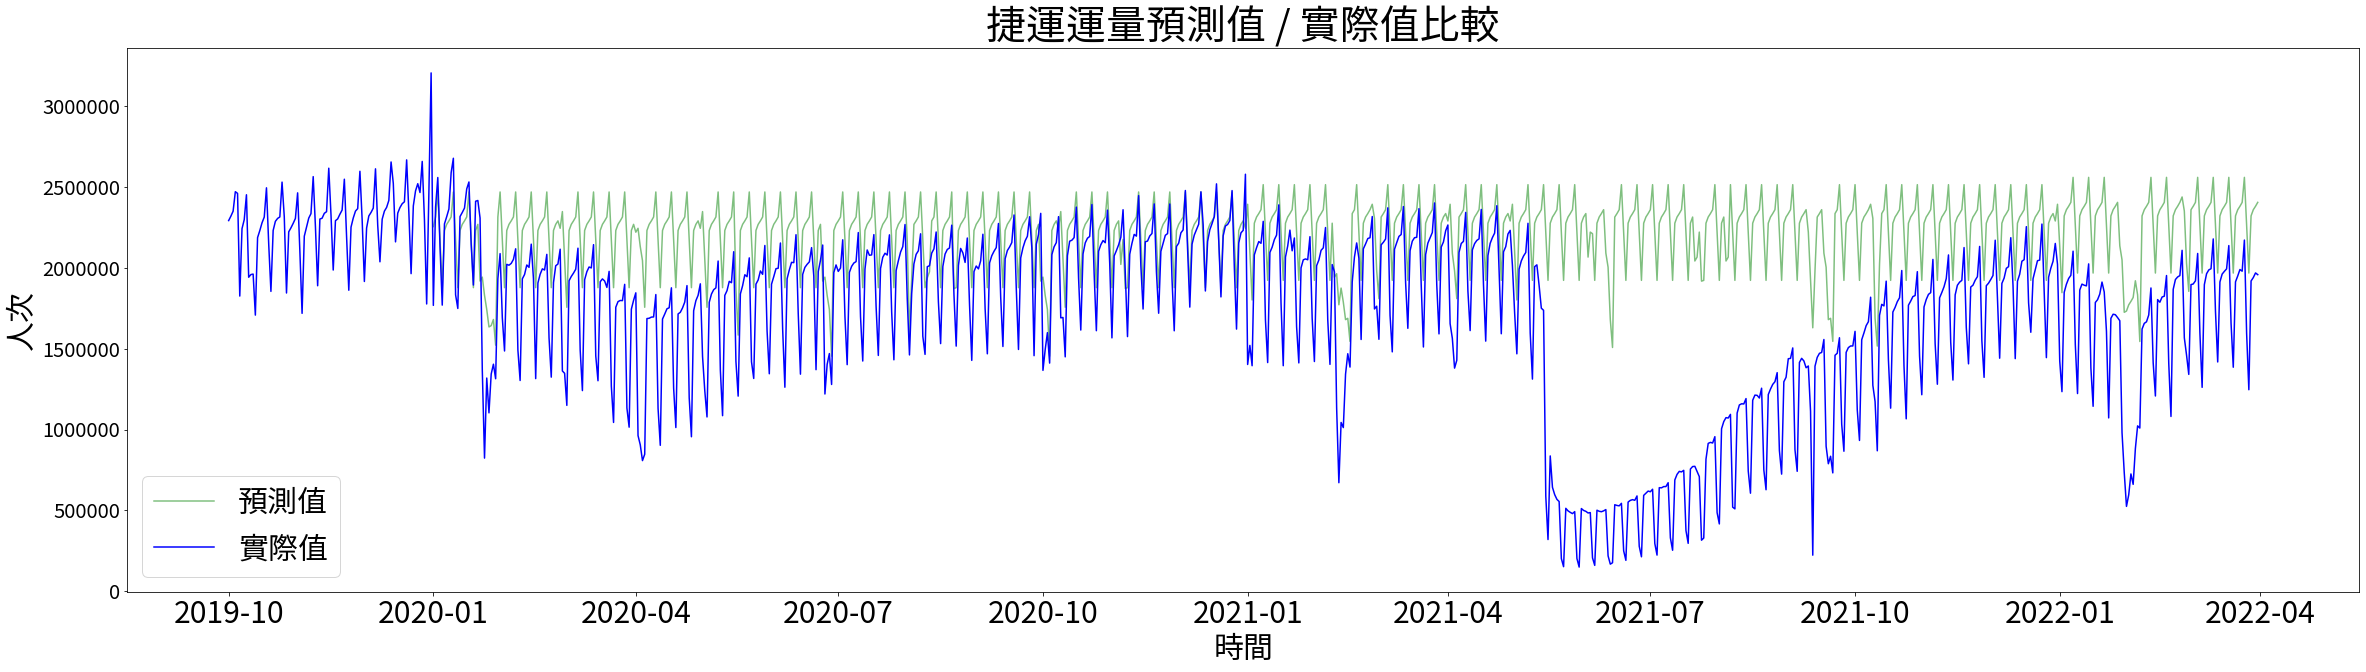

In [37]:
df_all_metro = df_all[df_all['metro_cnt']>0]
df_display = df_all_metro[df_all_metro['date'] >= dt.datetime( 2019, 10, 1)]
fig, ax = plt.subplots( figsize = ( 40, 10 ) )
plt.plot( df_5_metro_to_pre['date'], df_5_metro_to_pre.iloc[:,-1], label = '預測值', c = 'g', alpha = 0.5 )
plt.plot( df_display['date'], df_display['metro_cnt'], label = '實際值', c = 'b' )
plt.title( '捷運運量預測值 / 實際值比較', fontsize = 40 )
plt.xlabel( '時間', fontsize = 30 )
plt.ylabel( '人次', fontsize = 30 )
plt.xticks( fontsize = 30 )
plt.yticks( fontsize = 20 )
plt.legend( prop = {'size':30}, loc = 'lower left' )
ax.ticklabel_format(style='sci', scilimits=(-1,100), axis='y')
plt.savefig( 'images/MRT_Regression.jpg' )

In [38]:
min( df_all_metro['date'] )

Timestamp('2015-01-01 00:00:00')

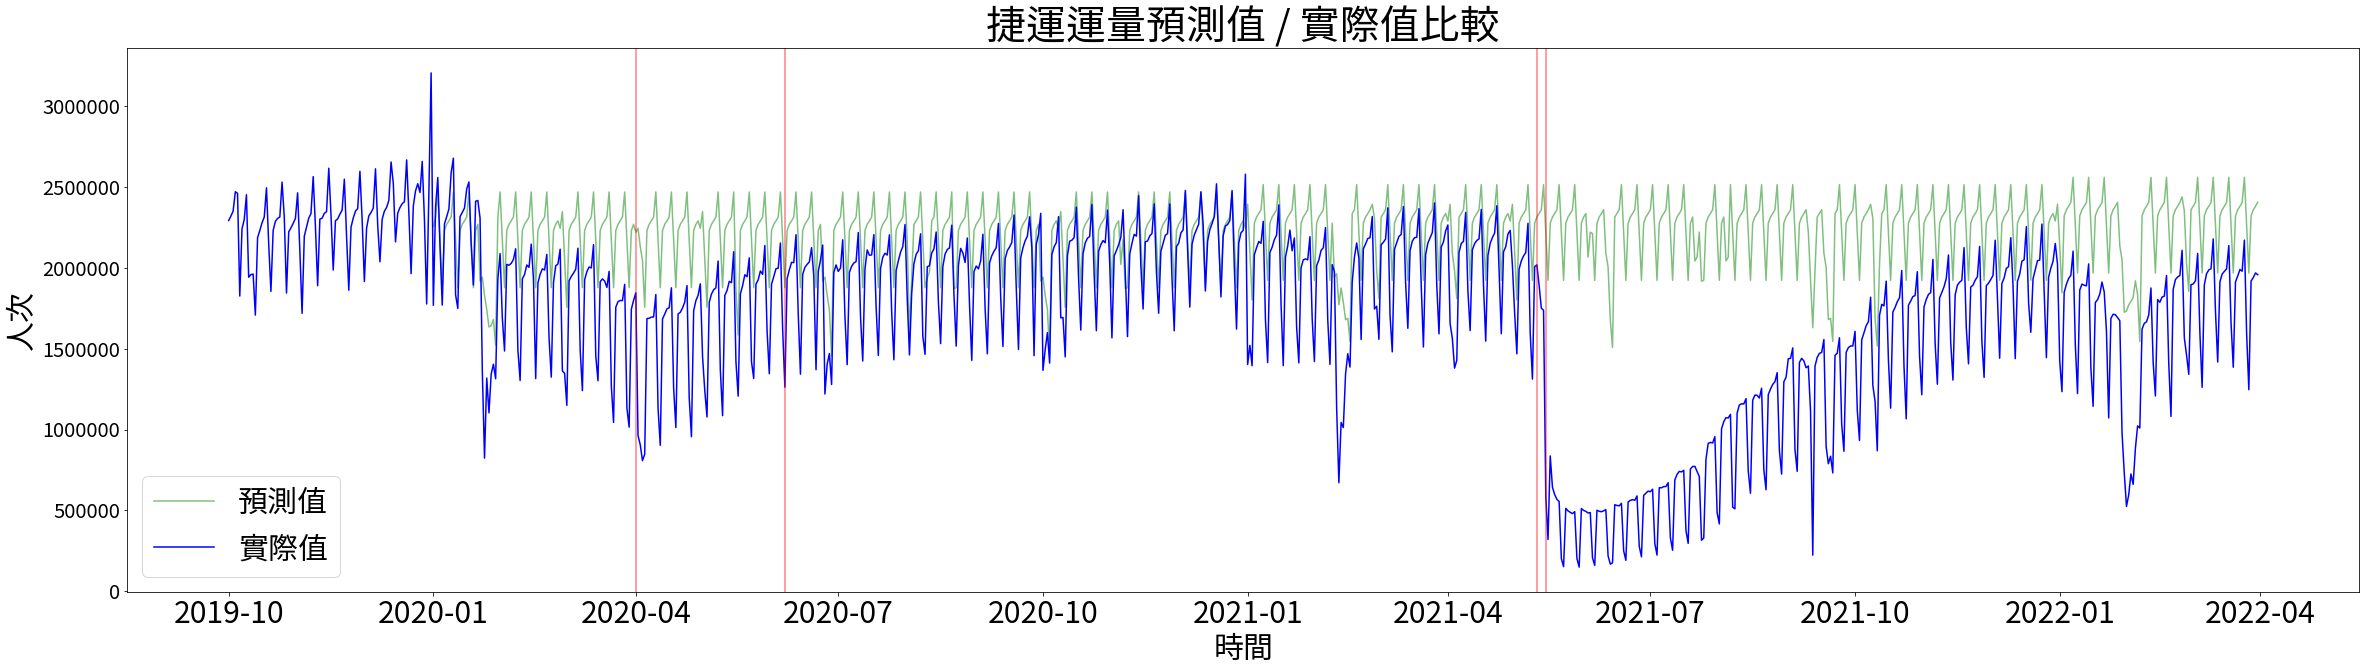

In [39]:
df_all_metro = df_all[df_all['metro_cnt']>0]
df_display = df_all_metro[df_all_metro['date'] >= dt.datetime( 2019, 10, 1)]
fig, ax = plt.subplots( figsize = ( 40, 10 ) )
plt.plot( df_5_metro_to_pre['date'], df_5_metro_to_pre.iloc[:,-1], label = '預測值', c = 'g', alpha = 0.5 )
plt.plot( df_display['date'], df_display['metro_cnt'], label = '實際值', c = 'b' )
plt.title( '捷運運量預測值 / 實際值比較', fontsize = 40 )
plt.axvline( x = dt.datetime( 2020, 4, 1 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2020, 6, 7 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2021, 5, 11 ), c = 'r', alpha = 0.5 )
plt.axvline( x = dt.datetime( 2021, 5, 15 ), c = 'r', alpha = 0.5 )
plt.xlabel( '時間', fontsize = 30 )
plt.ylabel( '人次', fontsize = 30 )
plt.xticks( fontsize = 30 )
plt.yticks( fontsize = 20 )
plt.legend( prop = {'size':30}, loc = 'lower left' )
ax.ticklabel_format(style='sci', scilimits=(-1,100), axis='y')
plt.savefig( 'images/MRT_Regression_time.jpg' )

## Regression Diagnostics

### Multicollinearity 

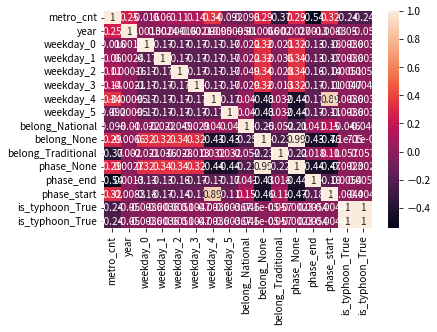

In [40]:
corr_1_3 = df_5_metro.corr()
_ = sns.heatmap(corr_1_3, annot=True)

### Autocorrelation

In [41]:
st, data, ss2 = sso.summary_table( result_reg, alpha=0.05 )
print( "Columns in data are: %s" % ss2 )
# Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


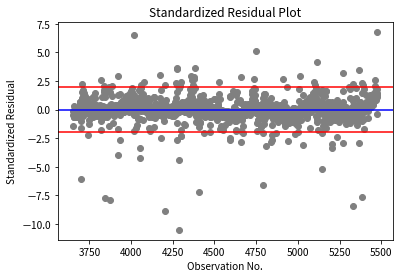

In [42]:
ID = df_5_metro.index
plt.plot(ID , SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

In [43]:
len( df_5_metro )

1826

In [44]:
d_w = ft.Durbin_Watson_test( SD )
print(d_w)

x_square_sum =  1855.4897933105779
size =  1826
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.          0.93878115  0.38315187 ... -1.47955715  2.15236658
  4.9661648 ]
d =  1.5856903256165826
1.5856903256165826


## Residual Analysis

### Normality

In [45]:
stats.shapiro( SD )

ShapiroResult(statistic=0.7595301270484924, pvalue=1.401298464324817e-45)

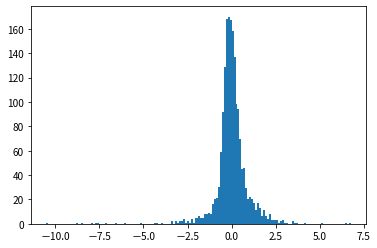

In [46]:
_ = plt.hist( SD, bins='auto' )

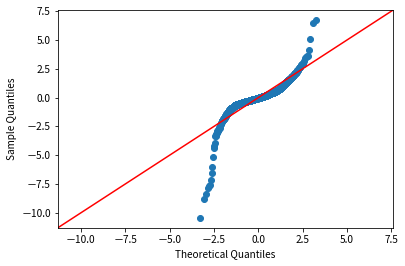

In [47]:
fig = sm.qqplot( SD, stats.norm, fit=True, line = '45' ) 

### Heteroscedasticity and homoscedasticity

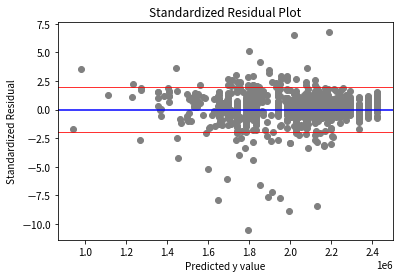

In [48]:
y_pre = data[:, 2]
plt.plot( y_pre, SD, 'o', color='gray' )
plt.axhline( y=2, color='red', lw=0.8 )
plt.axhline( y=0, color='blue' )
plt.axhline( y=-2, color='red', lw=0.8 )
plt.title( 'Standardized Residual Plot' )
plt.xlabel( 'Predicted y value' )
plt.ylabel( 'Standardized Residual' )
plt.show()

### Non-independent of the Error Variable

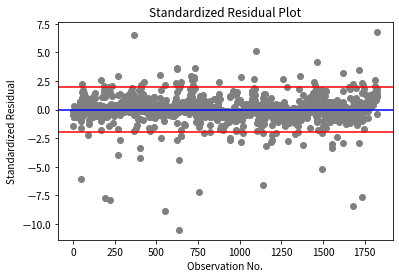

runs =  468
n1 =  913
n2 =  913
runs_exp =  914.0
stan_dev =  21.360006156686815
z =  -20.880143794358332
pval_z =  8.114729819698936e-97
p_value for Z-statistic=  8.114729819698936e-97


In [49]:
Id1 = data[ :, 0 ]
plt.plot( Id1, SD, 'o', color='gray' )
plt.axhline( y=0, color='blue' )
plt.axhline( y=2, color='red' )
plt.axhline( y=-2, color='red' )
plt.title( 'Standardized Residual Plot' )
plt.xlabel( 'Observation No.' )
plt.ylabel( 'Standardized Residual' )
plt.show()

SD_median = np.median( SD )
Z_pval = ft.runsTest( SD, SD_median )
print( 'p_value for Z-statistic= ', Z_pval )